## Import Libraries

In [38]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

## CNN-2D Model

In [47]:
# ImageDataGenerator generate batches of tensor image data with real-time data augmentation.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('F:/School/fruits_data/our-data/training',
                                                 target_size = (64, 64),
                                                 batch_size = 16,
                                                 class_mode='binary', 
                                                 )

test_set = test_datagen.flow_from_directory('F:/School/fruits_data/our-data/validation',
                                            target_size = (64, 64),
                                            batch_size = 16,
                                            class_mode='binary'
                                            )

Found 42 images belonging to 5 classes.
Found 10 images belonging to 5 classes.


In [48]:
training_set.class_indices

{'apple_6': 0,
 'cabbage_white_1': 1,
 'carrot_1': 2,
 'cucumber_1': 3,
 'eggplant_violet_1': 4}

In [1]:
# Initialising the CNN
model = Sequential()

# Convolution
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution
model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
model.add(Flatten())

# Full connection
model.add(Dense(units = 512, activation = 'relu'))

# Add Dropout to prevent overfitting
# model.add(Dropout(0.5))

model.add(Dense(units = 128, activation = 'relu'))

model.add(Dense(units = 5, activation = 'softmax'))

# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

NameError: name 'Sequential' is not defined

In [50]:
##from tensorflow.keras.callbacks import EarlyStopping
#early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

In [51]:
# Fitting the model
classifier = model.fit(training_set,
                         #steps_per_epoch = 250,
                         epochs = 30,
                         validation_data = test_set,    
                         #validation_steps = 50,
                         #callbacks=[early_stop]
                         )

Epoch 1/30
2/3 [===================>..........] - ETA: 0s - loss: 1.6465 - accuracy: 0.2692

C:\Users\khanh\anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


3/3 [==============================] - 1s 276ms/step - loss: 1.6498 - accuracy: 0.2381 - val_loss: 1.5401 - val_accuracy: 0.6000
Epoch 2/30
3/3 [==============================] - 0s 157ms/step - loss: 1.5374 - accuracy: 0.3810 - val_loss: 1.4712 - val_accuracy: 0.3000
Epoch 3/30
3/3 [==============================] - 0s 120ms/step - loss: 1.4332 - accuracy: 0.5714 - val_loss: 1.2811 - val_accuracy: 0.7000
Epoch 4/30
3/3 [==============================] - 0s 149ms/step - loss: 1.2076 - accuracy: 0.6667 - val_loss: 1.0701 - val_accuracy: 0.6000
Epoch 5/30
3/3 [==============================] - 0s 140ms/step - loss: 0.9803 - accuracy: 0.6190 - val_loss: 1.3716 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 0s 151ms/step - loss: 0.8959 - accuracy: 0.6905 - val_loss: 0.9375 - val_accuracy: 0.7000
Epoch 7/30
3/3 [==============================] - 0s 135ms/step - loss: 0.8076 - accuracy: 0.7381 - val_loss: 1.2433 - val_accuracy: 0.6000
Epoch 8/30
3/3 [===============

In [52]:
# save the model
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


## Loss & Accuracy Graph (Training and Test)

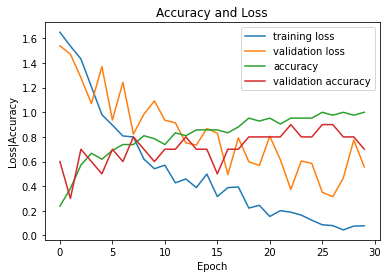

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 30
plt.plot(np.arange(0, numOfEpoch), classifier.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), classifier.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), classifier.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), classifier.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()